https://stackoverflow.com/questions/33720645/why-is-this-tensorflow-implementation-vastly-less-successful-than-matlabs-nn

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [15]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_vbariable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

xTrain = np.linspace(.2, .8, 101)[np.newaxis, :]
yTrain = 1/xTrain

x = tf.placeholder("float", [1,None])
hiddenDim = 10

b = bias_variable([hiddenDim,1])
W = weight_variable([hiddenDim, 1])

b2 = bias_variable([1])
W2 = weight_variable([1, hiddenDim])

hidden = tf.nn.sigmoid(tf.matmul(W, x) + b)
y = tf.matmul(W2, hidden) + b2

# Minimize the squared errors.
loss = tf.reduce_mean(tf.square(y - yTrain))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# For initializing the variables.
init = tf.initialize_all_variables()

# Launch the graph
sess = tf.Session()
sess.run(init)

for step in xrange(0, 4001):
    train.run({x: xTrain}, sess)
    if step % 500 == 0:
        print loss.eval({x: xTrain}, sess)


33.1688
0.735795
0.00819243
0.00392356
0.00314292
0.00272895
0.00236401
0.00202366
0.00172051


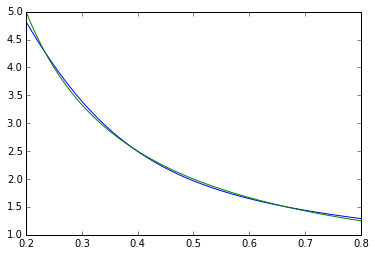

In [4]:
xTest = np.linspace(0.2, 0.8, 1001)
yTest = y.eval({x:toNd(xTest)}, sess)  
import matplotlib.pyplot as plt
plt.plot(xTest,yTest.transpose().tolist())
plt.plot(xTest,map(lambda x: 1/x, xTest))
plt.show()